In [119]:
import pandas as pd
import numpy as np
from sklearn.dummy import DummyClassifier
from datetime import date
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [2]:
def read_csv():
    df_submission = pd.read_csv('../../../src/data/data/raw/SubmissionFormat.csv')
    df_test = pd.read_csv('../../../src/data/data/raw/test_set.csv')
    df_training_labels = pd.read_csv('../../../src/data/data/raw/train_set_labels.csv')
    df_training_values = pd.read_csv('../../../src/data/data/raw/train_set_values.csv')


In [6]:
def drop():
    X_train = df_training_values.drop('id',axis=1)
    y_train = df_training_labels.drop('id',axis=1)
    X_test = df_test.drop('id',axis=1)

In [8]:
def mod_date(X):
    X['date_recorded'] = pd.to_datetime(X['date_recorded'])
    X['days_old'] = pd.to_datetime(date.today()) - X['date_recorded']
    X = X.drop('date_recorded',axis=1)
    return X

0   3214 days
1   2491 days
2   2500 days
3   2528 days
4   3093 days
Name: days_old, dtype: timedelta64[ns]

In [ ]:
mod_date(X_train)
mod_date(X_test)

In [9]:
X_test['date_recorded'] = pd.to_datetime(X_test['date_recorded'])
X_test['days_old'] = pd.to_datetime(date.today()) - X_test['date_recorded']
X_test = X_test.drop('date_recorded',axis=1)

In [10]:
def nan_func(column):
    for col in column:
        X_train[column].fillna('others', inplace=True)
        X_test[column].fillna('others', inplace=True)

In [11]:
nan_func('funder', 'installer', 'subvillage', 'scheme_management', 'permit')

In [ ]:
def permit(X):
    X['permit'] = X['permit'].replace({True: 'T', False: 'F'})

In [12]:
permit(X_train)
permit(X_test)

0        F
1        T
2        T
3        T
4        T
        ..
59395    T
59396    T
59397    F
59398    T
59399    T
Name: permit, Length: 59400, dtype: object

In [13]:
def dummy():
    clf = DummyClassifier(strategy='most_frequent', random_state=0)
    clf.fit(X_train, y_train)
    clf.score(X_train, y_train)

0.543080808080808

In [14]:
# 'funder'
X_train_min = X_train[['amount_tsh','gps_height', 'installer','wpt_name', 'num_private','basin','population','recorded_by','scheme_management',
                        'permit', 'construction_year','extraction_type','management_group','payment','quality_group','source_class','waterpoint_type_group','days_old']]
# X_train_max = X_train[['amount_tsh','gps_height', 'installer','wpt_name', 'num_private','subvillage','population','recorded_by','scheme_management',
#                        'permit', 'construction_year','extraction_type_class','management','payment','quantity','source', 'waterpoint_type','days_old']]

In [15]:
X_test_min = X_test[['amount_tsh','gps_height', 'installer','wpt_name', 'num_private','basin','population','recorded_by','scheme_management',
                        'permit', 'construction_year','extraction_type','management_group','payment','quality_group','source_class','waterpoint_type_group','days_old']]
# X_test_max = X_test[['amount_tsh','gps_height', 'installer','wpt_name', 'num_private','subvillage','population','recorded_by','scheme_management',
#                        'permit', 'construction_year','extraction_type_class','management','payment','quantity','source', 'waterpoint_type','days_old']]

In [23]:
def clean_object(input_df):
    column = input_df.columns
    for col in column:
        if (input_df[col].dtype) == object:
            to_change = []
            if input_df[col].value_counts().size > 50:
                for ind, val in enumerate(input_df[col].value_counts()):
                    if (ind % 1000 == 0):
                    if (val < 500):
                        to_change.append(input_df[col].value_counts().keys()[ind])
            for chan in to_change:
                input_df[col].replace(chan, 'other', inplace = True)
    return input_df

In [24]:
X_clean_train_min = clean_object(X_train_min)


amount_tsh
gps_height
installer
0
1000
2000


/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


wpt_name
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
num_private
basin
population
recorded_by
scheme_management
permit
construction_year
extraction_type
management_group
payment
quality_group
source_class
waterpoint_type_group
days_old


In [25]:
X_clean_test_min = clean_object(X_test_min)

amount_tsh
gps_height
installer
0
1000
wpt_name
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
num_private
basin
population
recorded_by
scheme_management
permit
construction_year
extraction_type
management_group
payment
quality_group
source_class
waterpoint_type_group
days_old


In [28]:
#parses df for cateborical variables
# def ohe_func(input_df: pd.DataFrame, cat_var: List[str]) -> pd.DataFrame:
def ohe_func(input_df,X_test, items):
    """One Hot Encodes categorical variables"""
    object_list = []
    other_list = []
    for var in items:
        if (input_df[var].dtype) == object:
            object_list.append(var)
        else:
            other_list.append(var)
#         # Load necessary data
    cat_df = input_df[object_list]
    cat_df_test = X_test[object_list]
#         # Create OHE object
    ohe = OneHotEncoder(categories = 'auto', handle_unknown='ignore').fit(cat_df)
#         # Create OHE DataFrame
    ohe_df = pd.DataFrame(ohe.transform(cat_df).toarray(), 
                    columns=ohe.get_feature_names(object_list))
    ohe_df_test = pd.DataFrame(ohe.transform(cat_df_test).toarray(), 
                    columns=ohe.get_feature_names(object_list))
    return pd.concat([ohe_df,input_df[other_list]], axis=1), pd.concat([ohe_df_test,X_test[other_list]], axis=1)
    


In [29]:
X_train_min_ohe, X_test_min_ohe = ohe_func(X_clean_train_min,X_clean_test_min, ['amount_tsh', 'gps_height', 'installer',
                                         'wpt_name', 'num_private',
       'basin', 'population', 'recorded_by', 'scheme_management', 'permit',
       'construction_year', 'extraction_type', 'management_group', 'payment',
       'quality_group', 'source_class', 'waterpoint_type_group'])

## Writing Objects to Pickle

In [31]:
with open('data\X_train_min_ohe.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(X_train_min_ohe, f, pickle.HIGHEST_PROTOCOL)

In [32]:
with open('data\X_test_min_ohe.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(X_test_min_ohe, f, pickle.HIGHEST_PROTOCOL)

## Importing Objects from Pickle Files

In [33]:
with open('data.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data_object2 = pickle.load(f)
data_object2

FileNotFoundError: [Errno 2] No such file or directory: 'data.pickle'

In [77]:
from sklearn.metrics import plot_confusion_matrix, hamming_loss
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import xgboost as xgb
from sklearn import metrics

In [75]:
def get_score(model, X_train, y_train, y_train_hat):
    rec = recall_score(y_train, y_train_hat, average = 'weighted')
    hamming = hamming_loss(y_train, y_train_hat)
    f1 = f1_score(y_train, y_train_hat, average = 'weighted')
    prec = precision_score(y_train, y_train_hat, average = 'weighted')
    acc = model.score(X_train, y_train)
    print(f"""
        Recall Score: {rec} 
        Hamming Loss: {hamming} 
        f1 Score: {f1} 
        Precision Score: {prec}
        Accuracy: {acc}""")

# Decision Tree Classifier

In [71]:
dtc = DecisionTreeClassifier()

In [72]:
dtc.fit(X_train_min_ohe, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [73]:
y_train_pred_dtc = dtc.predict(X_train_min_ohe)

In [74]:
get_score(dtc, X_train_min_ohe, y_train, y_train_pred_dtc)


        Recall Score: 0.9161279461279461 

        Hamming Score: 0.08387205387205388 

        f1 Score: 0.9151410953212705 

        Precision Score: 0.916447372040426
        Accuracy: 0.9161279461279461


In [46]:
cf_dtc = confusion_matrix(y_train, y_train_pred_dtc)
cf_dtc

array([[30965,   260,  1034],
       [  915,  3154,   248],
       [ 2314,   211, 20299]])

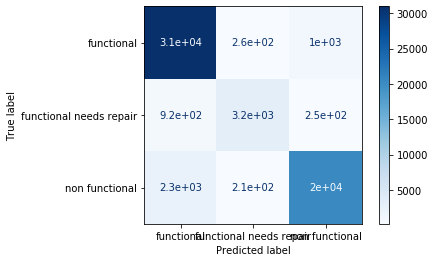

In [56]:
plot_confusion_matrix(dtc, X_train_min_ohe, y_train, cmap=plt.cm.
                     Blues)

In [107]:
dt_param_grid = {
    'criterion': ['gini'],
    'max_depth': [139],
    'min_samples_split': [9],
    'min_samples_leaf': [9]
}

In [108]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dtc, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train_min_ohe, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini'], 'max_depth': [139, 140, 141],


In [109]:
dt_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 139,
 'min_samples_leaf': 9,
 'min_samples_split': 9}

In [116]:
dtc2 = DecisionTreeClassifier(criterion='gini',
 max_depth= 139,
 min_samples_leaf= 9,
 min_samples_split= 9)
dtc2.fit(X_train_min_ohe, y_train)
y_train_pred_dtc = dtc2.predict(X_train_min_ohe)
get_score(dtc2, X_train_min_ohe, y_train, y_train_pred_dtc)


        Recall Score: 0.7865993265993266 
        Hamming Score: 0.2134006734006734 
        f1 Score: 0.7781116046294974 
        Precision Score: 0.780343041422055
        Accuracy: 0.7865993265993266


In [121]:
dt_cv_score = cross_val_score(dtc, X_train_min_ohe, y_train, cv=7)
mean_dt_cv_score = np.mean(dt_cv_score)

dt2_cv_score = cross_val_score(dtc2, X_train_min_ohe, y_train, cv=7)
mean_dt2_cv_score = np.mean(dt2_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")
print(f"Mean Cross Validation Best Param Score: {mean_dt2_cv_score :.2%}")

Mean Cross Validation Score: 70.84%
Mean Cross Validation Best Param Score: 72.39%


# Bagging

In [123]:
bagged_tree =  BaggingClassifier()
bagged_tree.fit(X_train_min_ohe, y_train)
y_train_pred_bagged = bagged_tree.predict(X_train_min_ohe)

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [125]:
get_score(bagged_tree, X_train_min_ohe, y_train, y_train_pred_bagged)


        Recall Score: 0.9029292929292929 
        Hamming Score: 0.09707070707070707 
        f1 Score: 0.9016239677149167 
        Precision Score: 0.9028263333024991
        Accuracy: 0.9029292929292929


In [126]:
cf_bt = confusion_matrix(y_train, y_train_pred_bagged)
cf_bt

array([[30635,   334,  1290],
       [ 1033,  2965,   319],
       [ 2565,   225, 20034]])

In [144]:
bt_param_grid = {
    'n_estimators' : [200],
    'max_samples' : [.4],
    'max_features': [.6]
}

In [145]:
# Instantiate GridSearchCV
bt_grid_search = GridSearchCV(bagged_tree, bt_param_grid, cv=3, return_train_score=True)

# Fit to the data
bt_grid_search.fit(X_train_min_ohe, y_train)

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensembl

GridSearchCV(cv=3, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_features': [0.6], 'max_samples': [0.4],
                         'n_estimators': [190, 200, 210]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [146]:
bt_grid_search.best_params_

{'max_features': 0.6, 'max_samples': 0.4, 'n_estimators': 200}

In [149]:
bt2 = BaggingClassifier(max_features=0.6,
 max_samples= 0.4,
 n_estimators= 200)
bt2.fit(X_train_min_ohe, y_train)
y_train_pred_bt2 = bt2.predict(X_train_min_ohe)
get_score(bt2, X_train_min_ohe, y_train, y_train_pred_bt2)

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        Recall Score: 0.8553367003367003 
        Hamming Score: 0.14466329966329966 
        f1 Score: 0.8476108475565942 
        Precision Score: 0.8597325206062738
        Accuracy: 0.8553367003367003


In [151]:
bt_cv_score = cross_val_score(bagged_tree, X_train_min_ohe, y_train, cv=7)
mean_bt_cv_score = np.mean(bt_cv_score)

bt2_cv_score = cross_val_score(bt2, X_train_min_ohe, y_train, cv=7)
mean_bt2_cv_score = np.mean(bt2_cv_score)

print(f"Mean Cross Validation Score: {mean_bt_cv_score :.2%}")
print(f"Mean Cross Validation Best Param Score: {mean_bt2_cv_score :.2%}")

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensembl

Mean Cross Validation Score: 73.74%
Mean Cross Validation Best Param Score: 75.63%


# Random Forest

In [152]:
rf = RandomForestClassifier()
rf.fit(X_train_min_ohe, y_train)
y_train_pred_rf = rf.predict(X_train_min_ohe)

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [153]:
get_score(rf, X_train_min_ohe, y_train, y_train_pred_rf)


        Recall Score: 0.916043771043771 
        Hamming Score: 0.08395622895622895 
        f1 Score: 0.9151533943522847 
        Precision Score: 0.9158436874146281
        Accuracy: 0.916043771043771


In [154]:
cf_rf = confusion_matrix(y_train, y_train_pred_rf)
cf_rf

array([[30755,   291,  1213],
       [  862,  3166,   289],
       [ 2140,   192, 20492]])

In [173]:
rf_param_grid = {
    'n_estimators': [700, 1100],
    'criterion': ['entropy'],
    'max_depth': [40],
    'min_samples_split': [5],
    'min_samples_leaf': [2]
}

In [174]:
# Instantiate GridSearchCV
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=3, return_train_score=True)

# Fit to the data
rf_grid_search.fit(X_train_min_ohe, y_train)

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/flatironschool/

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [175]:
rf_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 40,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1100}

In [176]:
rf2 = RandomForestClassifier(criterion='entropy',
 max_depth= 40,
 min_samples_split= 5,
 min_samples_leaf = 2,
 n_estimators = 600
                       )
rf2.fit(X_train_min_ohe, y_train)
y_train_pred_rf2 = rf2.predict(X_train_min_ohe)
get_score(rf2, X_train_min_ohe, y_train, y_train_pred_rf2)

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys



        Recall Score: 0.8117171717171717 
        Hamming Score: 0.18828282828282827 
        f1 Score: 0.7971303054323561 
        Precision Score: 0.8146129408966476
        Accuracy: 0.8117171717171717


In [ ]:
rf_cv_score = cross_val_score(rf, X_train_min_ohe, y_train, cv=7)
mean_rf_cv_score = np.mean(rf_cv_score)

rf2_cv_score = cross_val_score(rf2, X_train_min_ohe, y_train, cv=7)
mean_rf2_cv_score = np.mean(rf2_cv_score)

print(f"Mean Cross Validation Score: {mean_rf_cv_score :.2%}")
print(f"Mean Cross Validation Best Param Score: {mean_rf2_cv_score :.2%}")

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/flatironschool/

# KNN

In [ ]:
ss = StandardScaler()
scaled_X_train = ss.fit_transform(X_Train_min_ohe)
knn = KNeighborClassifier()
knn.fit(scaled_X_train, y_train)
y_train_pred_knn = knn.predict(scaled_X_train)

In [ ]:
get_score(knn, scaled_X_train, y_train, y_train_pred_knn)

In [ ]:
cf_knn = confusion_matrix(y_train, y_train_pred_rf)
cf_knn

In [ ]:
knn_param_grid = {
    'n_neighbors': [5, 3, 10],
    'p': [2, 3, 4],
    'weights':['uniform', 'distance']
} 

In [ ]:
# Instantiate GridSearchCV
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=3, return_train_score=True)

# Fit to the data
knn_grid_search.fit(scaled_X_train, y_train)

# XG Boost

In [ ]:
xg = xgb.XGBClassifier()
xg.fit(X_train_min_ohe, y_train)
y_train_pred_xg = xg.predict(X_train_min_ohe)

In [ ]:
get_score(xg, X_train_min_ohe, y_train, y_train_pred_xg)

In [ ]:
cf_xg = confusion_matrix(y_train, y_train_pred_xg)
cf_xg

In [ ]:
xg_param_grid = {
    'learning_rate': [.1, .01, .5, 1],
    'max_depth': [3, 5, 8],
    'n_estimators': [10, 100, 1000],    
}

In [ ]:
# Instantiate GridSearchCV
xg_grid_search = GridSearchCV(xg, xg_param_grid, cv=3, return_train_score=True)

# Fit to the data
xg_grid_search.fit(X_train_min_ohe, y_train)

# Pipeline